## K-Means算法进行聚类

In [43]:
from sklearn.cluster import KMeans
import pandas as pd

### 读取源数据并构建特征矩阵

In [44]:
#读取源数据
data = pd.read_excel("../DataSource/result.xlsx")

In [45]:
print(data)

    source ID  T1548  T1548.002  T1548.004  T1548.001  T1548.003  T1134  \
0       G0099      0          0          0          0          0      0   
1       G0006      0          0          0          0          0      0   
2       G0005      0          0          0          0          0      0   
3       G0023      0          0          0          0          0      0   
4       G0025      0          0          0          0          0      0   
..        ...    ...        ...        ...        ...        ...    ...   
125     G0044      0          0          0          0          0      0   
126     G0102      0          0          0          0          0      0   
127     G0128      0          0          0          0          0      0   
128     G0018      0          0          0          0          0      0   
129     G0045      0          0          0          0          0      0   

     T1134.002  T1134.003  T1134.004  ...  T1497.002  T1600  T1600.002  \
0            0          0

In [27]:
# 提取特征列数据，构建特征矩阵
feature_columns = data.columns[1:]  # 选择除了第一列之外的所有列作为特征列
X = data[feature_columns].values

In [28]:
# 输出特征矩阵
print(X.shape)

(130, 594)


### 聚类

In [95]:
# 指定聚类数目
k = 9

# 创建K-Means模型并进行训练
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# 获取聚类标签
labels = kmeans.labels_

# 获取聚类中心
centers = kmeans.cluster_centers_

# 将聚类标签和中心添加到数据集中
data['clustering_label'] = labels
data['clustering_center'] = [centers[label] for label in labels]

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [96]:
print(data)

    source ID  T1548  T1548.002  T1548.004  T1548.001  T1548.003  T1134  \
0       G0099      0          0          0          0          0      0   
1       G0006      0          0          0          0          0      0   
2       G0005      0          0          0          0          0      0   
3       G0023      0          0          0          0          0      0   
4       G0025      0          0          0          0          0      0   
..        ...    ...        ...        ...        ...        ...    ...   
125     G0044      0          0          0          0          0      0   
126     G0102      0          0          0          0          0      0   
127     G0128      0          0          0          0          0      0   
128     G0018      0          0          0          0          0      0   
129     G0045      0          0          0          0          0      0   

     T1134.002  T1134.003  T1134.004  ...  T1600.002  T1600.001  T1102  \
0            0          0

### 评估
评估聚类效果的常见算法和指标有以下几种：

轮廓系数（Silhouette Coefficient）：轮廓系数衡量样本与其所属聚类的相似性和与其他聚类的差异程度。它的取值范围在[-1, 1]之间，值越接近1表示聚类效果越好。

Dunn指数：Dunn指数度量聚类结果中簇间距离与簇内距离之间的关系。它的取值范围大于等于0，值越大表示聚类效果越好。

DB指数（Davies-Bouldin Index）：DB指数度量聚类结果中簇内的紧密度和簇间的分离度。它的取值范围大于等于0，值越小表示聚类效果越好。

这些评估聚类效果的算法和指标可用于对聚类结果进行定量评估，并选择最佳的聚类算法、参数设置或解释聚类结果的合理性。具体选择哪种评估算法取决于数据集的性质、聚类任务的目标以及您的需求和偏好。

#### 轮廓系数

In [31]:
from sklearn.metrics import silhouette_score

In [97]:
silhouette_avg = silhouette_score(X, labels)

In [98]:
print(silhouette_avg)

0.04663953604942404


#### Dumn指数和DB指数

In [99]:
from sklearn.metrics import pairwise_distances,davies_bouldin_score
import numpy as np

In [100]:
# 计算样本间的欧氏距离矩阵
dist_matrix = pairwise_distances(X)

# 计算簇内距离的最小值
intra_cluster_distances = []
for i in range(k):
    indices = np.where(labels == i)[0]
    intra_distances = dist_matrix[indices][:, indices]
    min_intra_distance = np.min(intra_distances)
    intra_cluster_distances.append(min_intra_distance)

# 计算簇间距离的最大值
inter_cluster_distances = []
for i in range(k):
    indices_i = np.where(labels == i)[0]
    for j in range(i + 1, k):
        indices_j = np.where(labels == j)[0]
        inter_distances = dist_matrix[indices_i][:, indices_j]
        max_inter_distance = np.max(inter_distances)
        inter_cluster_distances.append(max_inter_distance)

# 计算Dunn指数
dunn_index = np.min(intra_cluster_distances) / np.max(inter_cluster_distances)
print("Dunn指数:", dunn_index)

Dunn指数: 0.0


In [101]:
# 假设有数据集 X 和对应的聚类结果 labels
db_score = davies_bouldin_score(X, labels)
print("DB指数:", db_score)

DB指数: 2.0148512241051018


### 可视化

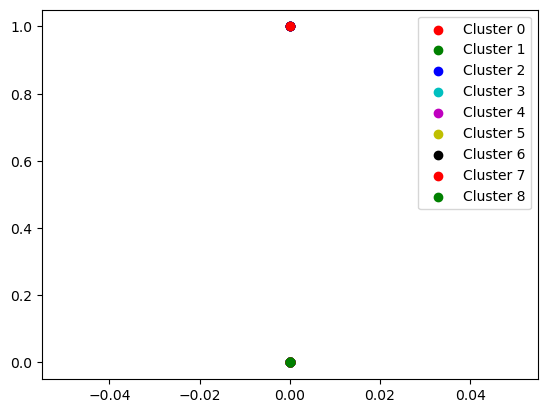

In [102]:
import matplotlib.pyplot as plt

# 假设聚类结果存储在变量labels中，labels是一个包含每个样本所属簇的列表或数组

# 获取每个簇的唯一标签
unique_labels = set(labels)

# 定义颜色列表，用于区分不同的簇
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# 绘制散点图
for label in unique_labels:
    # 获取属于当前簇的样本索引
    indices = [i for i, l in enumerate(labels) if l == label]
    
    # 获取属于当前簇的样本的特征向量
    cluster_points = X[indices]
    
    # 提取特征向量的两个维度，用于绘制散点图
    x = cluster_points[:, 0]
    y = cluster_points[:, 1]
    
    # 绘制当前簇的散点图
    plt.scatter(x, y, c=colors[label % len(colors)], label=f'Cluster {label}')

# 添加图例
plt.legend()

# 显示图形
plt.show()


当两个聚类重合在一起时，这可能表示聚类算法无法明确地将这两个聚类区分开来，或者存在数据的特殊性质导致聚类结果出现重叠。在这种情况下，可以考虑以下几种方法来处理重叠的聚类：

调整聚类算法参数：尝试调整聚类算法的参数，例如聚类数目、距离度量方法、初始聚类中心的选择等。不同的参数设置可能会导致不同的聚类结果，进而解决重叠聚类的问题。

使用不同的聚类算法：尝试使用其他不同的聚类算法进行比较，看是否能够更好地将数据分离成不重叠的聚类。不同的聚类算法具有不同的性质和假设，适用于不同类型的数据集。

数据预处理和特征选择：考虑对数据进行预处理和特征选择，以消除数据中的噪声或冗余信息。通过数据清洗、降维、特征选择等方法，可以改善聚类效果并减少聚类重叠。

手动调整聚类结果：如果重叠的聚类对于问题的解决没有实际影响，并且聚类结果符合问题领域的知识和理解，可以手动调整聚类结果，将重叠的聚类合并为一个或将其分离为多个独立的聚类。

混合聚类方法：考虑使用混合聚类方法，例如谱聚类（spectral clustering）或模糊聚类（fuzzy clustering），这些方法可以在一定程度上处理聚类重叠的情况。

最适合的处理方法取决于具体的数据和问题背景。建议结合领域知识和实际需求来选择合适的方法，或者尝试组合多种方法来解决聚类重叠的问题。

In [ ]:
5rbg